# 종합실습1 단변량 분석

# 1.비즈니스 시나리오

![](https://cdn.images.express.co.uk/img/dynamic/24/590x/child-car-seat-986556.jpg?r=1532946857754)

* 고객사는 카시트를 판매하는 회사 입니다.
    * 최근 매출 하락에 대해 각 부서가 파악한 원인 다음과 같습니다. 
        * 최근에 경쟁사와의 가격 경쟁력이 하락하고 있고, 광고비용이 적절하게 집행되지 않음
        * 너무 국내 시장에 집중됨.
        * 지역마다의 구매력을 제대로 파악하지 못하고 있음.
    * 그러나 이러한 분석은 데이터에 근거하고 있는지 의문이 듭니다.

* 이 문제를 해결하고자 프로젝트 팀이 빌딩되었습니다. 
    * 여러분은 이 프로젝트팀에 데이터분석전문가 이자 AI 개발자로 참여하고 있습니다.
    * 드디어 AIVLE 과정에서 갈고 닦은 실력을 발휘할 기회가 주어졌습니다.
    * 자, 이제 단변량 분석을 통해 비즈니스 인사이트를 도출해 봅시다!


# 2.환경준비

## (1) 라이브러리 불러오기

In [1]:
import numpy as np
import pandas as pd

import matplotlib.pyplot as plt
import seaborn as sns

## (2) 데이터 로딩 : 카시트 판매량 데이터

|	변수명	|	설명	|	구분	|
|	----	|	----	|	----	|
|	Sales 	|	 각 지역 판매량(단위 : 1000개)	|	Target	|
|	CompPrice 	|	 경쟁사 가격(단위 : 달러)	|	feature	|
|	Income 	|	 지역 평균 소득(단위 : 1000달러)	|	feature	|
|	Advertising 	|	 각 지역, 회사의 광고 예산(단위 : 1000달러)	|	feature	|
|	Population 	|	 지역 인구수(단위 : 1000명)	|	feature	|
|	Price 	|	 자사 지역별 판매가격	|	feature	|
|	ShelveLoc 	|	 진열상태	|	feature	|
|	Age 	|	 지역 인구의 평균 연령	|	feature	|
|	Urban 	|	 도심 지역 여부(Yes,No)	|	feature	|
|	US 	|	 매장이 미국에 있는지 여부(Yes,No)	|	feature	|


In [2]:
path = 'https://raw.githubusercontent.com/DA4BAM/dataset/master/Carseats2.csv'
data = pd.read_csv(path)
data.head()

,Sales,CompPrice,Income,Advertising,Population,Price,ShelveLoc,Age,Urban,US
0,9.50,138,73,11,276,120,Bad,42,Yes,Yes
1,11.22,111,48,16,260,83,Good,65,Yes,Yes
2,10.06,113,35,10,269,80,Medium,59,Yes,Yes
3,7.40,117,100,4,466,97,Medium,55,Yes,Yes
4,4.15,141,64,3,340,128,Bad,38,Yes,No


# 3.단변량분석 : 숫자형 변수

In [16]:
def eda1_n(data, var, bins=20):
    # 기초통계량
    display(data[[var]].describe().T)

    # 시각화
    plt.figure(figsize=(8, 10))
    plt.subplot(2, 1, 1)
    sns.histplot(x=var, data=data, bins=bins, kde=True)

    plt.subplot(2, 1, 2)
    sns.boxplot(x=var, data=data)
    plt.grid()

    plt.show()

## (1) Sales (Target) 

In [18]:
var = 'Sales'

1) 변수의 비즈니스 의미

* 각 지역 판매량(단위 : 1000개)
* Target

2) 기초통계량(수치화)

In [4]:
data[var].describe()

count    400.000000
mean       7.496325
std        2.824115
min        0.000000
25%        5.390000
50%        7.490000
75%        9.320000
max       16.270000
Name: Sales, dtype: float64

3) 분포 확인(시각화)

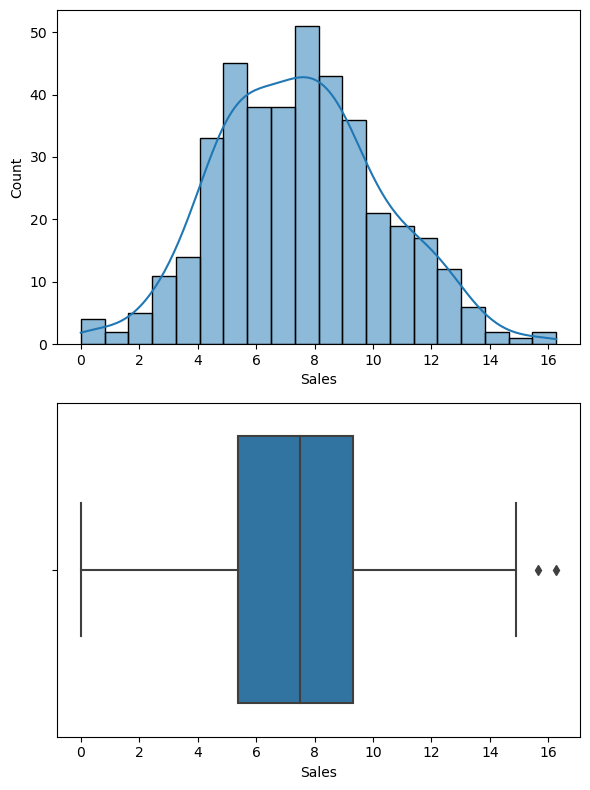

In [6]:
plt.figure(figsize = (6,8))
plt.subplot(2,1,1)
sns.histplot(data[var], bins = 20, kde = True)

plt.subplot(2,1,2)
sns.boxplot(x=data[var])

plt.tight_layout()
plt.show()

,count,mean,std,min,25%,50%,75%,max
Sales,400.0,7.496325,2.824115,0.0,5.39,7.49,9.32,16.27


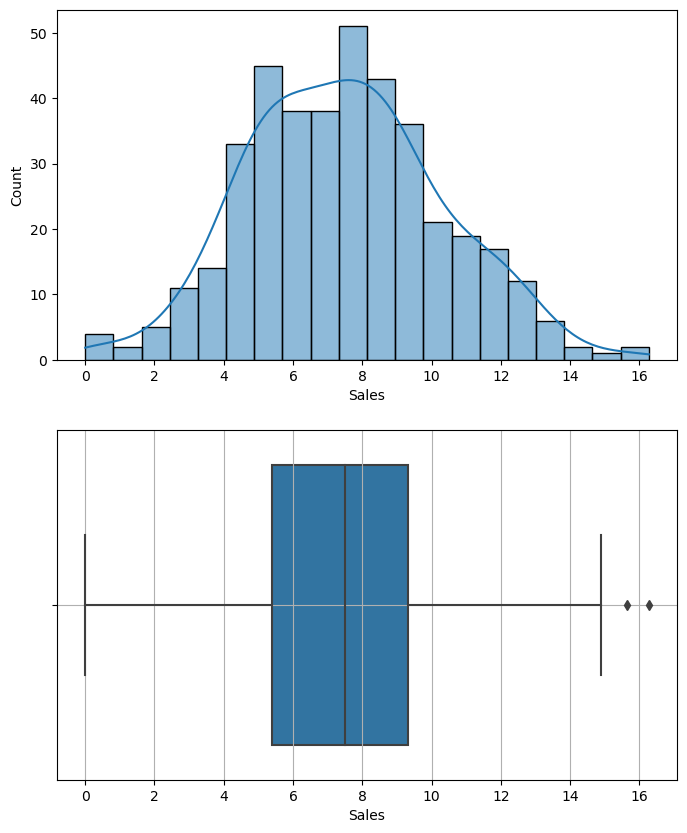

In [19]:
eda1_n(data, var)

4) 기초통계량과 분포를 통해서 파악한 내용을 적어 봅시다.

보이는 그대로를 넘어, 비즈니스 관점에서 고민하며 적어 봅시다.

* 대부분의 판매량이 5천개 ~ 만개 사이

5) 추가 분석해 볼 사항이 있나요?

- 판매량 구간을 0 ~ 4천, 4천 ~ 1만, 1만 이상 으로 구분해서 분석해 볼 필요 있음.
- 판매량이 0인 지역은 뭘까?

## (2) CompPrice

1) 변수의 비즈니스 의미

- 경쟁사 가격
- 단위 : 달러

2) 기초통계량(수치화)
3) 분포 확인(시각화)

,count,mean,std,min,25%,50%,75%,max
CompPrice,400.0,124.975,15.334512,77.0,115.0,125.0,135.0,175.0


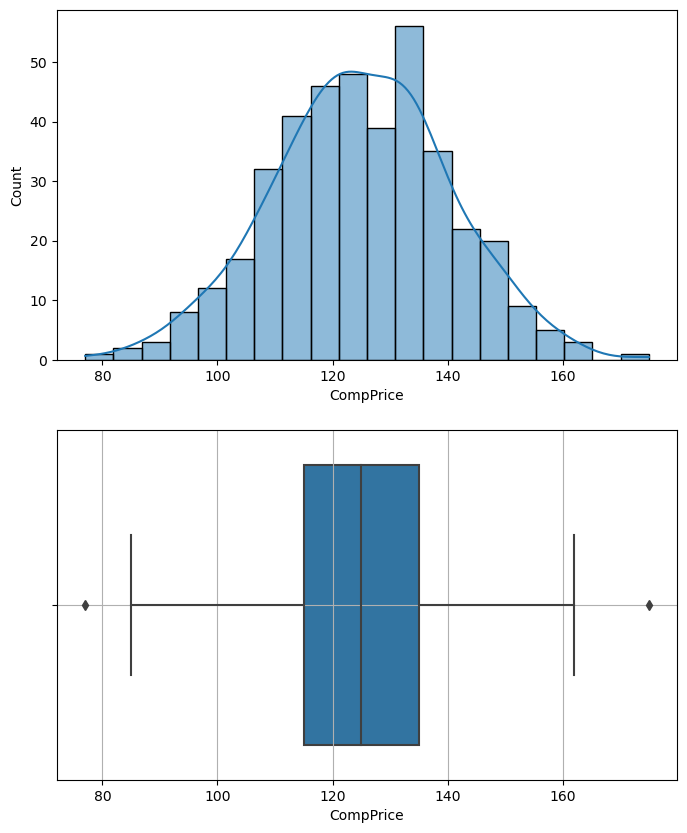

In [20]:
var = 'CompPrice'

eda1_n(data, var)

4) 기초통계량과 분포를 통해서 파악한 내용을 적어 봅시다.

보이는 그대로를 넘어, 비즈니스 관점에서 고민하며 적어 봅시다.

- 대부분 115 ~ 135 달러사이에 가격 형성
- 135 달러에 가격형성이 많이 되어있다.

5) 추가 분석해 볼 사항이 있나요?

- 양 끝 값을 가지는 곳은 어디인가, 그 곳에서의 우리 매출은 어떠한가
- 지역 평균 소득 별로 경쟁사의 가격 분포는 어떠한가

## (3) Income

1) 변수의 비즈니스 의미

- 지역 평균 소득
- 단위 : 1000달러

2) 기초통계량(수치화)

3) 분포 확인(시각화)

,count,mean,std,min,25%,50%,75%,max
Income,400.0,68.6575,27.986037,21.0,42.75,69.0,91.0,120.0


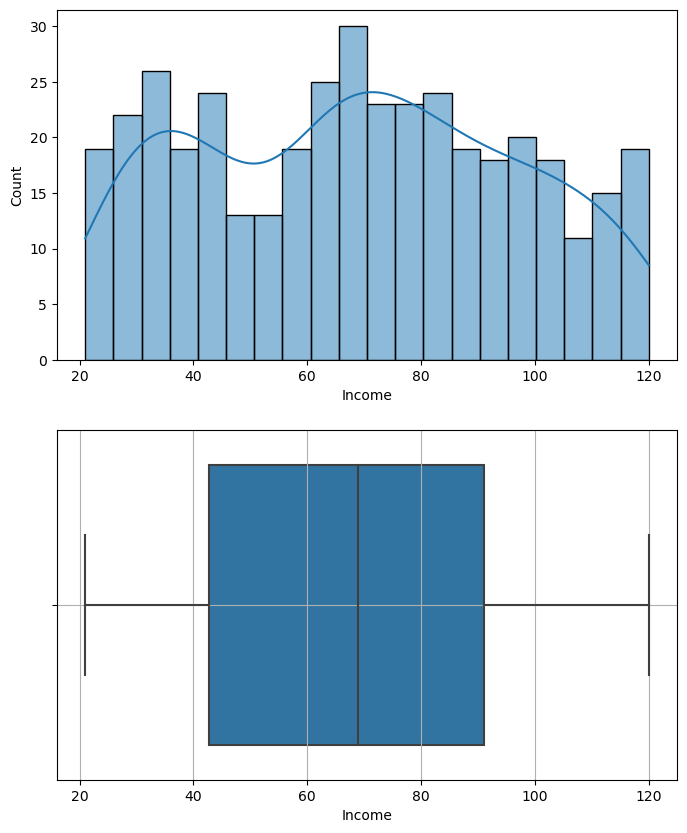

In [21]:
var = 'Income'
eda1_n(data, var)

4) 기초통계량과 분포를 통해서 파악한 내용을 적어 봅시다.

보이는 그대로를 넘어, 비즈니스 관점에서 고민하며 적어 봅시다.

- 전반적으로 비슷하게 형성되어있음

5) 추가 분석해 볼 사항이 있나요?

- 지역 평균 소득은 전체적으로 비슷한데, 평균 소득별로 판매량의 차이가 있는가?

## (4) Advertising

In [32]:
var = 'Advertising'

1) 변수의 비즈니스 의미

- 각 지역, 회사의 광고 예산
- 단위 : 1000 달러

2) 기초통계량(수치화)

3) 분포 확인(시각화)

,count,mean,std,min,25%,50%,75%,max
Advertising,400.0,6.635,6.650364,0.0,0.0,5.0,12.0,29.0


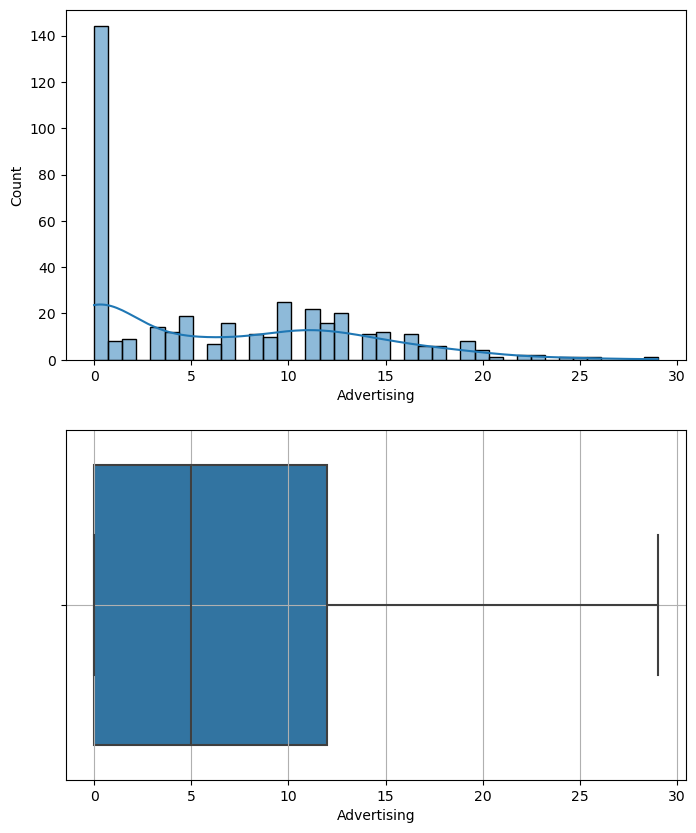

In [34]:
eda1_n(data, var, 40)

4) 기초통계량과 분포를 통해서 파악한 내용을 적어 봅시다.

보이는 그대로를 넘어, 비즈니스 관점에서 고민하며 적어 봅시다.

- 25%가 광고를 안함
- 12000 달러까지 75% 분포

5) 추가 분석해 볼 사항이 있나요?

- 광고예산이 있는 지역과 없는 지역의 판매량 차이가 있는가?
- 지역 평균 소득과 광고예산의 차이가 있는가?

,count,mean,std,min,25%,50%,75%,max
Advertising,256.0,10.367188,5.509879,1.0,6.0,10.0,14.0,29.0


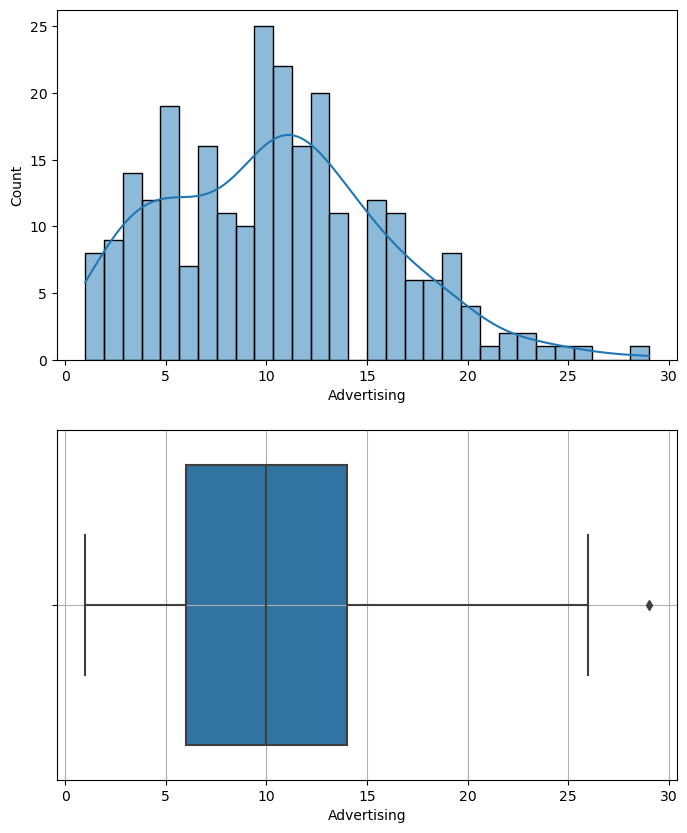

In [54]:
temp = data.loc[data['Advertising'] > 0]
eda1_n(temp, 'Advertising', 30)

- 10,000 달러 이하, 이상 분포 차이?

## (5) Population

In [35]:
var = 'Population'

1) 변수의 비즈니스 의미

- 지역 인구수
- 단위 : 1000명

2) 기초통계량(수치화)

3) 분포 확인(시각화)

,count,mean,std,min,25%,50%,75%,max
Population,400.0,264.84,147.376436,10.0,139.0,272.0,398.5,509.0


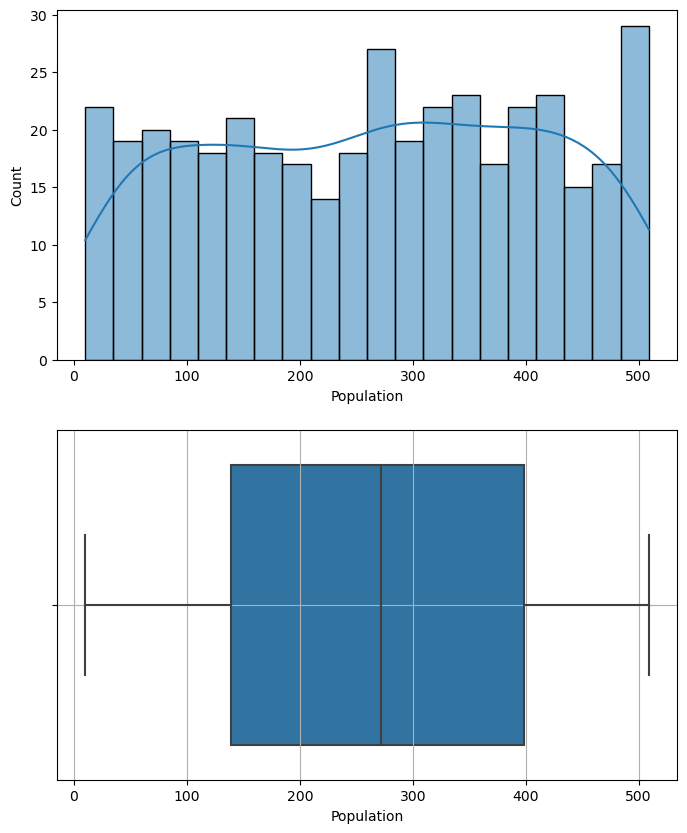

In [36]:
eda1_n(data, var)

4) 기초통계량과 분포를 통해서 파악한 내용을 적어 봅시다.

보이는 그대로를 넘어, 비즈니스 관점에서 고민하며 적어 봅시다.

- 인구 분포는 전체적으로 비슷함
- 500,000 명 이상인 지역이 상당히 많음

5) 추가 분석해 볼 사항이 있나요?

- 500,000 명 이상인 지역에서의 판매량은 어떤가
- 대도시 소도시로 구분할수 있을까?

## (6) Price

In [37]:
var = 'Price'

1) 변수의 비즈니스 의미

- 자사 지역별 판매 가격

2) 기초통계량(수치화)

3) 분포 확인(시각화)

,count,mean,std,min,25%,50%,75%,max
Price,400.0,115.795,23.676664,24.0,100.0,117.0,131.0,191.0


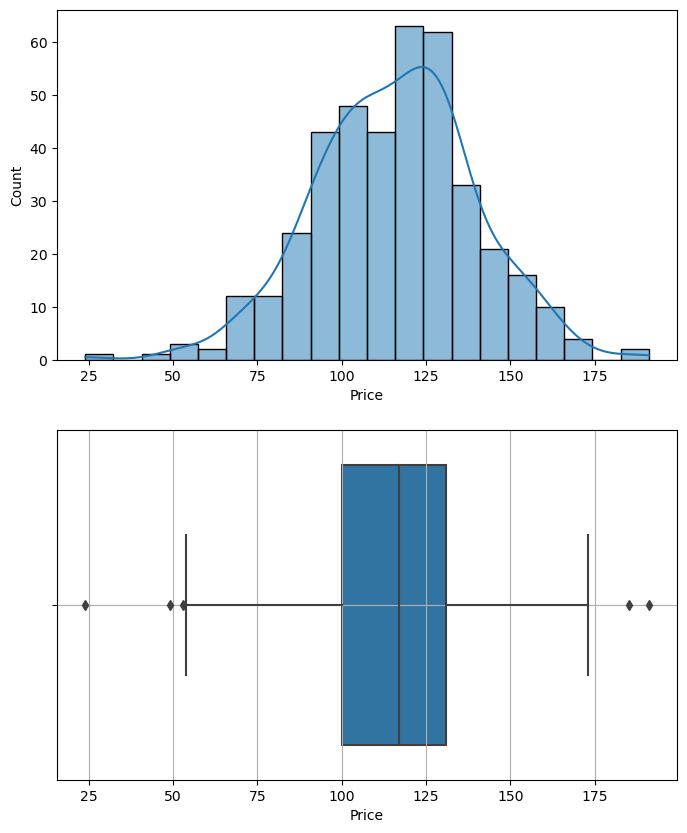

In [38]:
eda1_n(data, var)

4) 기초통계량과 분포를 통해서 파악한 내용을 적어 봅시다.

보이는 그대로를 넘어, 비즈니스 관점에서 고민하며 적어 봅시다.

- 100 ~ 131 달러에 50% 분포
- 양 끝 값 존재

5) 추가 분석해 볼 사항이 있나요?

- 경쟁사 가격과의 차이와 판매량의 차이가 있을까?
- 경쟁사 가격의 min은 77달러였는데, 자사의 min은 24달러인 이유는 무엇일까?

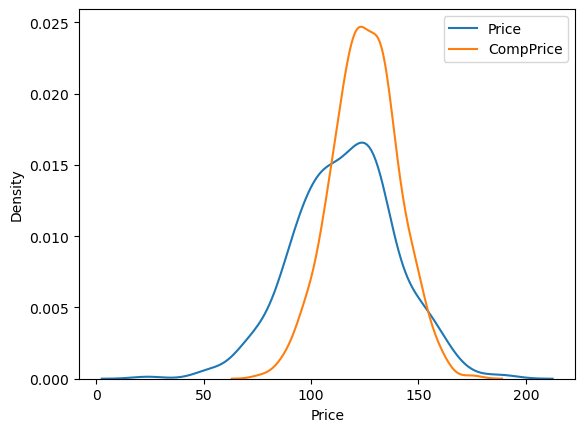

In [51]:
sns.kdeplot(x='Price', data=data, label='Price')
sns.kdeplot(x='CompPrice', data=data, label='CompPrice')
plt.legend()
plt.show()

## (7) Age

In [39]:
var = 'Age'

1) 변수의 비즈니스 의미

- 지역 인구의 평균 연령

2) 기초통계량(수치화)

3) 분포 확인(시각화)

,count,mean,std,min,25%,50%,75%,max
Age,400.0,53.3225,16.200297,25.0,39.75,54.5,66.0,80.0


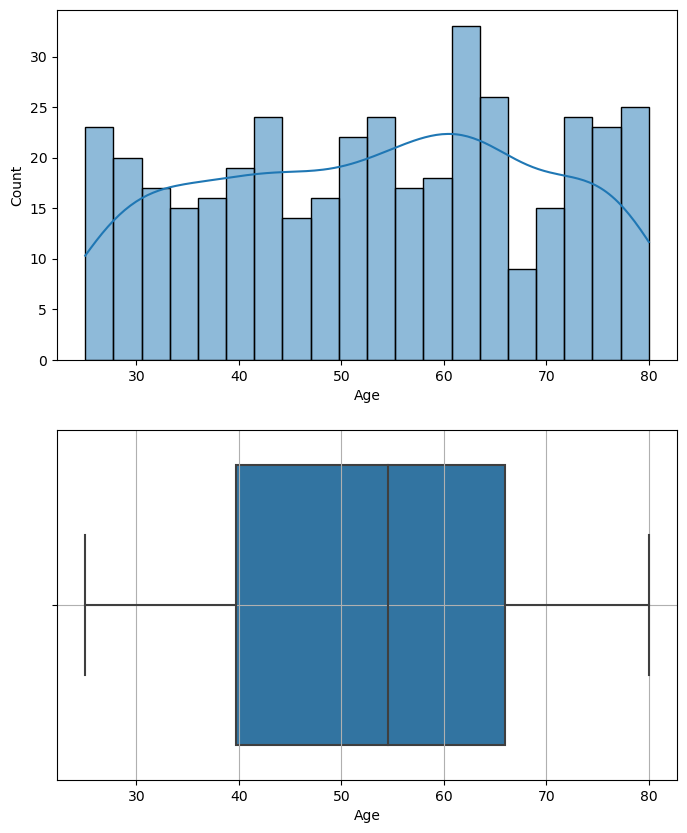

In [40]:
eda1_n(data, var)

4) 기초통계량과 분포를 통해서 파악한 내용을 적어 봅시다.

보이는 그대로를 넘어, 비즈니스 관점에서 고민하며 적어 봅시다.

- 연령은 고루 분포 하고 있다.

5) 추가 분석해 볼 사항이 있나요?

- 연령대별 판매량은 어떠한가?
- 30~40 정도의 평균연령에서의 판매량이 높을까?

# 4.단변량분석 : 범주형 변수

In [60]:
def eda1_c(data, var):
    # 범주별 빈도수
    print(data[var].value_counts())

    # 범주별 비율
    print(data[var].value_counts() / data[var].shape[0])

    sns.countplot(x=data[var])
    plt.grid()
    plt.show()

## (1) ShelveLoc

In [58]:
var = 'ShelveLoc'

1) 변수의 비즈니스 의미

* 매장 진열상태

2) 기초통계량(수치화)

In [12]:
# 범주별 빈도수
data[var].value_counts()

Medium    219
Bad        96
Good       85
Name: ShelveLoc, dtype: int64

In [13]:
# 범주별 비율
data[var].value_counts() / data[var].shape[0]

Medium    0.5475
Bad       0.2400
Good      0.2125
Name: ShelveLoc, dtype: float64

3) 분포 확인(시각화)

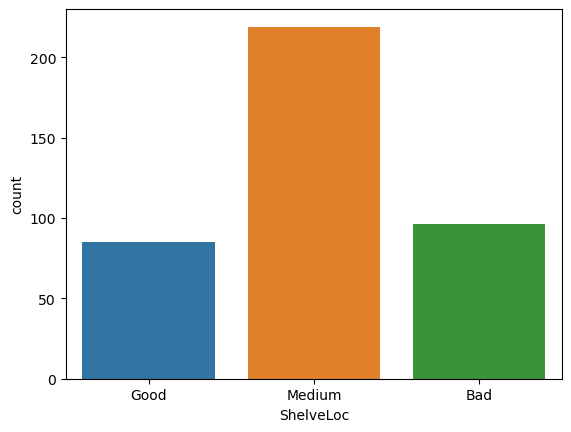

In [15]:
sns.countplot(x=data[var], order = ['Good','Medium','Bad'])
plt.show()

Medium    219
Bad        96
Good       85
Name: ShelveLoc, dtype: int64
Medium    0.5475
Bad       0.2400
Good      0.2125
Name: ShelveLoc, dtype: float64


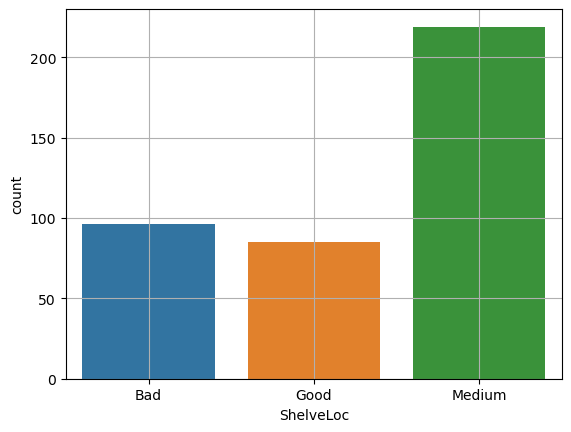

In [61]:
eda1_c(data, var)

4) 기초통계량과 분포를 통해서 파악한 내용을 적어 봅시다.

보이는 그대로를 넘어, 비즈니스 관점에서 고민하며 적어 봅시다.

* 진열 상태가 중간 정도 가 54%

5) 추가 분석해 볼 사항이 있나요?

* 진열상태에 따른 판매량 차이
* 지역, 인구수와 진열 상태 관계 비교

## (2) Urban

In [62]:
var = 'Urban'

1) 변수의 비즈니스 의미

- 도심 지역 여부 (Yes, No)

2) 기초통계량(수치화)

3) 분포 확인(시각화)

Yes    282
No     118
Name: Urban, dtype: int64
Yes    0.705
No     0.295
Name: Urban, dtype: float64


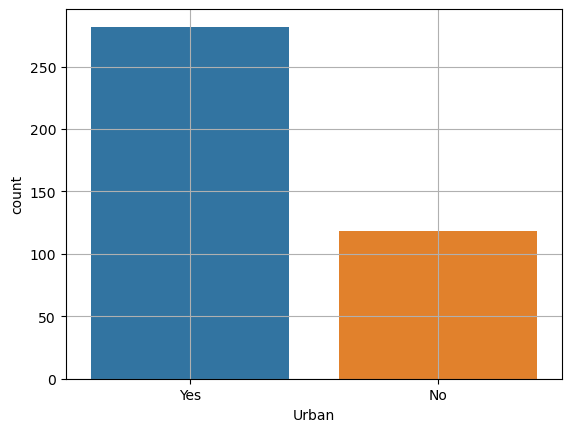

In [63]:
eda1_c(data, var)

4) 기초통계량과 분포를 통해서 파악한 내용을 적어 봅시다.

보이는 그대로를 넘어, 비즈니스 관점에서 고민하며 적어 봅시다.

- 도심지역이 70%

5) 추가 분석해 볼 사항이 있나요?

- 도심에 따른 평균소득과 경쟁사 가격, 판매량은 어떠한가

## (3) US

In [64]:
var = 'US'

1) 변수의 비즈니스 의미

- 매장이 미국에 있는지 여부 (Yes, No)

2) 기초통계량(수치화)

3) 분포 확인(시각화)

Yes    258
No     142
Name: US, dtype: int64
Yes    0.645
No     0.355
Name: US, dtype: float64


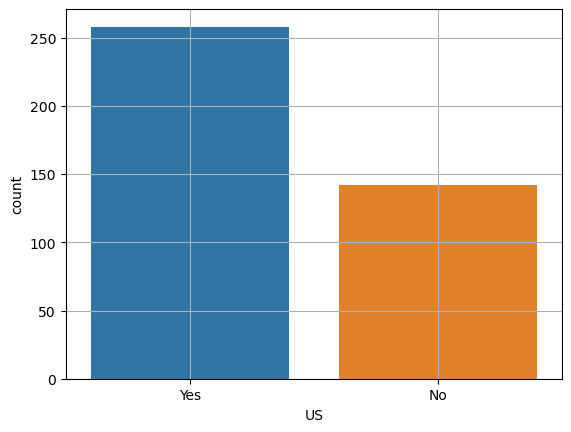

In [65]:
eda1_c(data, var)

4) 기초통계량과 분포를 통해서 파악한 내용을 적어 봅시다.

보이는 그대로를 넘어, 비즈니스 관점에서 고민하며 적어 봅시다.

- 미국이 64.5%

5) 추가 분석해 볼 사항이 있나요?

- 매장의 미국 여부에 따른 판매량의 차이가 있는가?
- 매장의 미국 여부에 따른 경쟁사 가격, 지역 평균 소득의 차이가 있는가?

# 5. 개인 진행

## 1) 경쟁사와 가격차이
1. 가격 차이 칼럼 생성

In [42]:
data['Price_Diff'] = data['Price'] - data['CompPrice']

2. 수치화 및 시각화

,count,mean,std,min,25%,50%,75%,max
Price_Diff,400.0,-9.18,19.262664,-57.0,-21.25,-9.0,4.0,46.0


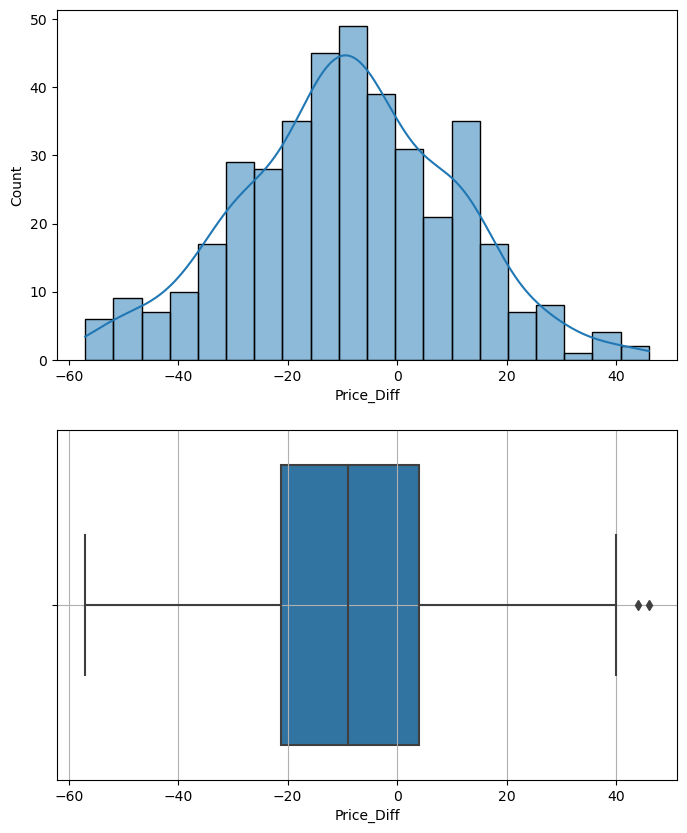

In [43]:
eda1_n(data, var='Price_Diff')

<AxesSubplot:xlabel='Price_Diff'>

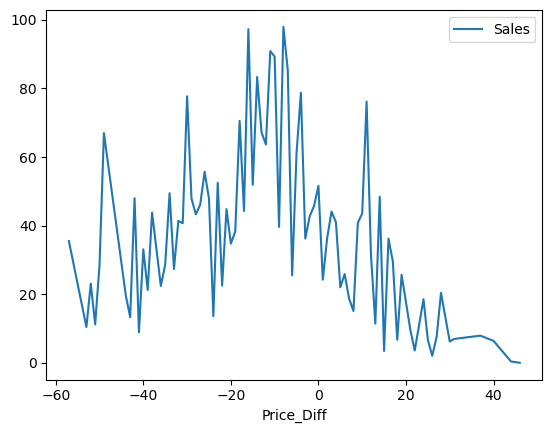

In [46]:
data.groupby(['Price_Diff'])[['Sales']].sum().plot()